## 1. Import tools

In [2]:
import sys
sys.path.append('/g/g92/miao1/Development/llsmvis')
sys.path.append('/Users/yi10/Desktop/Research/Software/T-llsmvis/')
sys.path.append('/g/g92/yi10')
import llsmvis
from llsmvis.extensions import hp3d
from llsmvis.extensions.hp3d import surface_morphometrics as sm
from llsmvis.extensions.hp3d import masscenter as mc
from llsmvis.extensions.hp3d import croproi3d as c3d
from llsmvis.extensions.hp3d import tools_writeout as tools
import h5py
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import vtk
from vtk.util import numpy_support
from llsmvis.extensions.hp3d import tools_vectorsets as v
from scipy.interpolate import griddata
import copy

%load_ext autoreload
%autoreload 2

Loading BokehJS ...

# First, separate datasets into 2 conditions

In [3]:
fpaths=[x for x in os.listdir('/p/lscratchh/yi10/hp3d') if x.startswith('2021')]
# separate fpaths into 2 groups, one is naive macrophage, the other one is infected macrophage.
fpaths_naive_macr=[]
fpaths_Lg_macr_cl=[]

for i, fpath in enumerate(fpaths):
    if fpath.startswith('2021-09-'):
        fpaths_naive_macr.append(fpath)
    
    if fpath.startswith('2021-10-01'):
        fpaths_naive_macr.append(fpath)
    
    if fpath.startswith('2021-10-04'):
        fpaths_naive_macr.append(fpath)
    
    if fpath.startswith('2021-10-06'):
        fpaths_naive_macr.append(fpath)
    
    if fpath.startswith('2021-10-08'):
        fpaths_naive_macr.append(fpath)
    
    if fpath.startswith('2021-10-14'):
        fpaths_naive_macr.append(fpath)
        
    
    if fpath.startswith('2021-10-28'):
        fpaths_Lg_macr_cl.append(fpath)
    
    if fpath.startswith('2021-10-29'):
        fpaths_Lg_macr_cl.append(fpath)
    
    if fpath.startswith('2021-11-'):
        fpaths_Lg_macr_cl.append(fpath)

print(str(len(fpaths_naive_macr))+' naive macrophage cells')
print(str(len(fpaths_Lg_macr_cl))+' infected macrophage cells')

133 naive macrophage cells
101 infected macrophage cells


# Broadcast to all datasets

In [6]:
tag=0
for fpath in fpaths:
    tag+=1
    append_polarity_vector_amplitudes(fpath)
    print(tag)

1
2
3
4


KeyboardInterrupt: 

In [4]:
# think about whwat to look at

# plot polarity vector amplitude evolution per cell
# plot polarity vector angle evolution per cell (phi and theta?)
# plot histogram of all polarity vector amplitude

# plot number of roughness maxima
# plot number of rougness minima


In [5]:
f = h5py.File(h5path, 'r')
f.close()

NameError: name 'h5path' is not defined

In [7]:
# plot polarity vector amplitude evolution per cell, and append it to the cell hdf5
# fpath=fpaths_naive_macr[0]

def append_polarity_vector_amplitudes(fpath, showplot=False):
    cell_hdf5_path='/p/lscratchh/yi10/hp3d/'+fpath+'/hp3ddata_'+fpath+'.hdf5'
    As=[]
    for timeind in np.arange(50):
            conespath = '/p/lscratchh/yi10/hp3d/'+fpath+'/cone_cuts_analysis/time'+str(timeind).zfill(4)
            h5path = os.path.join(conespath, 'patch-wise-roughness-volumes.hdf5')
            f = h5py.File(h5path, 'r')
            a=np.asarray(f['polarity based on volume - polarity vector'])
            As.append(np.linalg.norm(a))
            f.close()

    f2 = h5py.File(cell_hdf5_path, 'a')
    try:
        del f2['[D14] polarity vector amplitudes']
    except:
        pass
    f2.create_dataset("[D14] polarity vector amplitudes", data=np.asarray(As), dtype='float')
    f2.close()
    if showplot:
        plt.plot(As,'o-')


In [8]:
# plot polarity vector amplitude evolution per cell, and append it to the cell hdf5
# fpath=fpaths_naive_macr[0]
def append_polarity_volume_roughness_metrics(fpath, showplot=False):
    cell_hdf5_path='/p/lscratchh/yi10/hp3d/'+fpath+'/hp3ddata_'+fpath+'.hdf5'
    a1s = []
    a2s = []
    a3s = []
    a4s = []
    a5s = []
    a6s = []
    t1 = '[D15] polarity based on volume - negative volume std'
    t2 = '[D16] polarity based on volume - positive volume std'
    t3 = '[D17] polarity based on volume - sum of negative delta volumes'
    t4 = '[D18] polarity based on volume - sum of positive delta volumes'
    t5 = '[D19] polarity based on roughness - maxima N'
    t6 = '[D20] polarity based on roughness - minima N'
    for timeind in np.arange(50):
            conespath = '/p/lscratchh/yi10/hp3d/'+fpath+'/cone_cuts_analysis/time'+str(timeind).zfill(4)
            h5path = os.path.join(conespath, 'patch-wise-roughness-volumes.hdf5')
            f = h5py.File(h5path, 'r')
            a1=np.asarray(f['polarity based on volume - negative volume std'])
            a2=np.asarray(f['polarity based on volume - positive volume std'])
            a3=np.asarray(f['polarity based on volume - sum of negative delta volumes'])
            a4=np.asarray(f['polarity based on volume - sum of positive delta volumes'])
            a5=len(np.asarray(f['polarity based on roughness - maxima values']))
            a6=len(np.asarray(f['polarity based on roughness - minima values']))
            
            a1s.append(a1)
            a2s.append(a2)
            a3s.append(a3)
            a4s.append(a4)
            a5s.append(a5)
            a6s.append(a6)
            
            f.close()

    f2 = h5py.File(cell_hdf5_path, 'a')
    
    for a, t in zip([a1s,a2s,a3s,a4s,a5s,a6s],[t1,t2,t3,t4,t5,t6]):
        try:
            del f2[t]
        except:
            pass
        f2.create_dataset(t, data=np.asarray(a), dtype='float')
    
    
    f2.close()
    if showplot:
        plt.figure(figsize=(10,10))
        plt.subplot(231);plt.plot(a1s,'o-');plt.title('std(negative dv)')
        plt.subplot(232);plt.plot(a2s,'o-');plt.title('std(positive dv)')
        plt.subplot(233);plt.plot(a3s,'o-');plt.title('sum(negative dv)')
        plt.subplot(234);plt.plot(a4s,'o-');plt.title('std(positive dv)')
        plt.subplot(235);plt.plot(a5s,'o-');plt.title('roughness maxima N')
        plt.subplot(236);plt.plot(a6s,'o-');plt.title('roughness minima N')
        

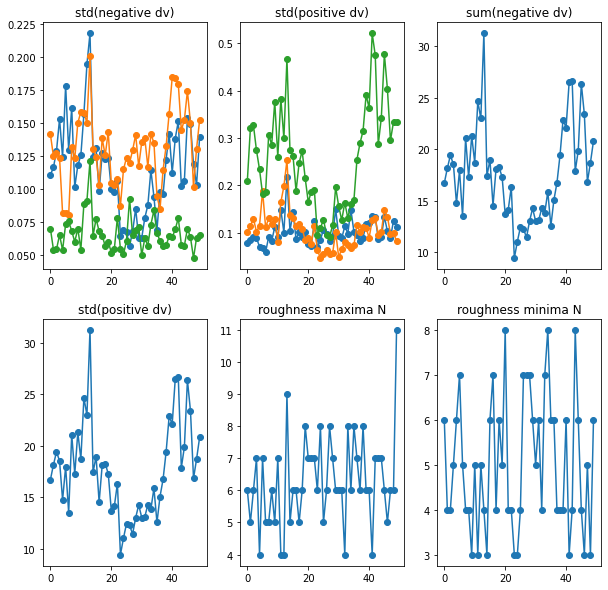

In [9]:
append_polarity_volume_roughness_metrics(fpaths[0], showplot=True)

In [14]:
# plot polarity vector amplitude evolution per cell, and append it to the cell hdf5
# fpath=fpaths_naive_macr[0]

def load_values(fpath, showplot=False):
    cell_hdf5_path='/p/lscratchh/yi10/hp3d/'+fpath+'/hp3ddata_'+fpath+'.hdf5'
    print(cell_hdf5_path)
    a0s = []
    a1s = []
    a2s = []
    a3s = []
    a4s = []
    a5s = []
    a6s = []
    
    t0 = '[D14] polarity vector amplitudes'
    t1 = '[D15] polarity based on volume - negative volume std'
    t2 = '[D16] polarity based on volume - positive volume std'
    t3 = '[D17] polarity based on volume - sum of negative delta volumes'
    t4 = '[D18] polarity based on volume - sum of positive delta volumes'
    t5 = '[D19] polarity based on roughness - maxima N'
    t6 = '[D20] polarity based on roughness - minima N'
    
    vs=[]

    f2 = h5py.File(cell_hdf5_path, 'r')
    
    for a, t in zip([a0s,a1s,a2s,a3s,a4s,a5s,a6s],[t0,t1,t2,t3,t4,t5,t6]):
        v=np.asarray(f2[t])
        vs.append(v)
    
    f2.close()
    return vs
        

In [11]:
fpath=fpaths[0]
cell_hdf5_path='/p/lscratchh/yi10/hp3d/'+fpath+'/hp3ddata_'+fpath+'.hdf5'
f2 = h5py.File(cell_hdf5_path, 'a')
for a in f2.keys():
    print(a)
f2.close()

[D10] volume values
[D11] surface area values
[D12] sphere radius with equi volume
[D13] sphere radius with equi surface area
[D14] polarity vector amplitudes
[D15] polarity based on volume - negative volume std
[D16] polarity based on volume - positive volume std
[D17] polarity based on volume - sum of negative delta volumes
[D18] polarity based on volume - sum of positive delta volumes
[D19] polarity based on roughness - maxima N
[D1] mass centers
[D20] polarity based on roughness - minima N
[D2] threshold saddle point
[D3] threshold saddle point index
[D4] threshold upper bound
[D5] threshold upper bound index
[D6] threshold lower bound
[D7] threshold lower bound index
[D8] threshold cell peripheral lower bound
[D9] volume centers
[G01] voxel value bin centers
[G02] voxel value histogram counts
[G03] stack XY mips before cropping
[G04] stack YZ mips before cropping
[G05] stack XZ mips before cropping
[G06] stack XY mips after cropping - saddle point to upper bound
[G07] stack YZ mip

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


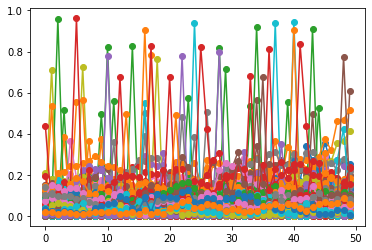

In [54]:
tag=0
for fpath in fpaths:
    append_polarity_vector_amplitudes(fpath, showplot=True)
    tag+=1
    print(tag)

cone volumes on cone vectors
cone volumes on map
cones stl paths
polarity based on roughness - maxima inds
polarity based on roughness - maxima phis
polarity based on roughness - maxima tags
polarity based on roughness - maxima thetas
polarity based on roughness - maxima values
polarity based on roughness - minima inds
polarity based on roughness - minima phis
polarity based on roughness - minima tags
polarity based on roughness - minima thetas
polarity based on roughness - minima values
polarity based on volume - negative center
polarity based on volume - negative delta volumes
polarity based on volume - negative volume std
polarity based on volume - polarity vector
polarity based on volume - positive center
polarity based on volume - positive delta volumes
polarity based on volume - positive volume std
polarity based on volume - sum of negative delta volumes
polarity based on volume - sum of positive delta volumes
polarity based on volume - total volumes of all cones
roughnesses on cone vectors
roughnesses on map

In [83]:
tag=0
for fpath in fpaths:
    append_polarity_volume_roughness_metrics(fpath, showplot=False)
    tag+=1
    print(tag)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


In [12]:
import copy

In [16]:
tag=0
vs=load_values(fpaths_naive_macr[0], showplot=False)
vs[1] = np.linalg.norm(vs[1],axis=1)
vs[2] = np.linalg.norm(vs[2],axis=1)
l=copy.deepcopy(vs);
for fpath in fpaths_naive_macr[1:]:
    try:
        vs=load_values(fpath, showplot=False)
        vs[1] = np.linalg.norm(vs[1],axis=1)
        vs[2] = np.linalg.norm(vs[2],axis=1)
        l=np.concatenate([l,vs],axis=1)    
        tag+=1
        print(tag)
    except:
        pass

values_for_naive_macrophage=copy.deepcopy(l)





/p/lscratchh/yi10/hp3d/2021-09-24-cell7/hp3ddata_2021-09-24-cell7.hdf5
/p/lscratchh/yi10/hp3d/2021-10-14-cell1/hp3ddata_2021-10-14-cell1.hdf5
1
/p/lscratchh/yi10/hp3d/2021-10-14-cell16/hp3ddata_2021-10-14-cell16.hdf5
2
/p/lscratchh/yi10/hp3d/2021-10-01-cell5/hp3ddata_2021-10-01-cell5.hdf5
3
/p/lscratchh/yi10/hp3d/2021-09-24-cell16/hp3ddata_2021-09-24-cell16.hdf5
4
/p/lscratchh/yi10/hp3d/2021-09-30-cell4/hp3ddata_2021-09-30-cell4.hdf5
5
/p/lscratchh/yi10/hp3d/2021-10-04-cell4/hp3ddata_2021-10-04-cell4.hdf5
6
/p/lscratchh/yi10/hp3d/2021-09-22-cell20/hp3ddata_2021-09-22-cell20.hdf5
7
/p/lscratchh/yi10/hp3d/2021-10-04-cell12/hp3ddata_2021-10-04-cell12.hdf5
8
/p/lscratchh/yi10/hp3d/2021-10-04-cell18/hp3ddata_2021-10-04-cell18.hdf5
9
/p/lscratchh/yi10/hp3d/2021-09-29-cell0/hp3ddata_2021-09-29-cell0.hdf5
10
/p/lscratchh/yi10/hp3d/2021-09-30-cell11/hp3ddata_2021-09-30-cell11.hdf5
11
/p/lscratchh/yi10/hp3d/2021-10-08-cell4/hp3ddata_2021-10-08-cell4.hdf5
12
/p/lscratchh/yi10/hp3d/2021-09-27-cell

108
/p/lscratchh/yi10/hp3d/2021-10-04-cell25/hp3ddata_2021-10-04-cell25.hdf5
109
/p/lscratchh/yi10/hp3d/2021-09-30-cell1/hp3ddata_2021-09-30-cell1.hdf5
110
/p/lscratchh/yi10/hp3d/2021-09-22-cell25/hp3ddata_2021-09-22-cell25.hdf5
111
/p/lscratchh/yi10/hp3d/2021-10-04-cell1/hp3ddata_2021-10-04-cell1.hdf5
112
/p/lscratchh/yi10/hp3d/2021-10-04-cell17/hp3ddata_2021-10-04-cell17.hdf5
113
/p/lscratchh/yi10/hp3d/2021-09-29-cell5/hp3ddata_2021-09-29-cell5.hdf5
114
/p/lscratchh/yi10/hp3d/2021-10-06-cell2/hp3ddata_2021-10-06-cell2.hdf5
115
/p/lscratchh/yi10/hp3d/2021-10-04-cell6/hp3ddata_2021-10-04-cell6.hdf5
116
/p/lscratchh/yi10/hp3d/2021-09-29-cell8/hp3ddata_2021-09-29-cell8.hdf5
117
/p/lscratchh/yi10/hp3d/2021-10-04-cell10/hp3ddata_2021-10-04-cell10.hdf5
118
/p/lscratchh/yi10/hp3d/2021-09-29-cell2/hp3ddata_2021-09-29-cell2.hdf5
119
/p/lscratchh/yi10/hp3d/2021-10-06-cell5/hp3ddata_2021-10-06-cell5.hdf5
120
/p/lscratchh/yi10/hp3d/2021-09-30-cell6/hp3ddata_2021-09-30-cell6.hdf5
121
/p/lscratchh/

In [17]:
tag=0
vs=load_values(fpaths_Lg_macr_cl[0], showplot=False)
vs[1] = np.linalg.norm(vs[1],axis=1)
vs[2] = np.linalg.norm(vs[2],axis=1)
l=copy.deepcopy(vs);
for fpath in fpaths_Lg_macr_cl[1:]:
    vs=load_values(fpath, showplot=False)
    vs[1] = np.linalg.norm(vs[1],axis=1)
    vs[2] = np.linalg.norm(vs[2],axis=1)
    l=np.concatenate([l,vs],axis=1)    
    tag+=1
    print(tag)

values_for_Lg_macrophage=copy.deepcopy(l)

/p/lscratchh/yi10/hp3d/2021-11-04-cell7/hp3ddata_2021-11-04-cell7.hdf5
/p/lscratchh/yi10/hp3d/2021-10-28-cell3/hp3ddata_2021-10-28-cell3.hdf5
1
/p/lscratchh/yi10/hp3d/2021-11-02-cell2/hp3ddata_2021-11-02-cell2.hdf5
2
/p/lscratchh/yi10/hp3d/2021-11-11-cell3/hp3ddata_2021-11-11-cell3.hdf5
3
/p/lscratchh/yi10/hp3d/2021-11-11-cell9/hp3ddata_2021-11-11-cell9.hdf5
4
/p/lscratchh/yi10/hp3d/2021-11-17-cell6/hp3ddata_2021-11-17-cell6.hdf5
5
/p/lscratchh/yi10/hp3d/2021-11-09-cell0/hp3ddata_2021-11-09-cell0.hdf5
6
/p/lscratchh/yi10/hp3d/2021-11-12-cell7/hp3ddata_2021-11-12-cell7.hdf5
7
/p/lscratchh/yi10/hp3d/2021-11-10-cell4/hp3ddata_2021-11-10-cell4.hdf5
8
/p/lscratchh/yi10/hp3d/2021-11-09-cell12/hp3ddata_2021-11-09-cell12.hdf5
9
/p/lscratchh/yi10/hp3d/2021-11-11-cell10/hp3ddata_2021-11-11-cell10.hdf5
10
/p/lscratchh/yi10/hp3d/2021-11-04-cell12/hp3ddata_2021-11-04-cell12.hdf5
11
/p/lscratchh/yi10/hp3d/2021-11-05-cell0/hp3ddata_2021-11-05-cell0.hdf5
12
/p/lscratchh/yi10/hp3d/2021-10-29-cell4/hp3d

In [18]:
values_for_naive_macrophage.shape

(7, 6550)

In [19]:
values_for_Lg_macrophage.shape

(7, 5050)

In [20]:
v1=values_for_naive_macrophage
v2=values_for_Lg_macrophage

In [56]:
def plot_histogram(k1,k2,ttstr,bs=[]):
    [a1, b1] = np.histogram(k1, bins=bs, density=True)
    plt.plot((b1[1:]+b1[:-1])/2, a1*(b1[1]-b1[0]), 'k', linewidth=2)
    [a2, b2] = np.histogram(k2, bins=bs,density=True)
    plt.plot((b2[1:]+b2[:-1])/2, a2*(b2[1]-b2[0]), 'r', linewidth=2)
    plt.title(ttstr)

<Figure size 720x720 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 720x720 with 0 Axes>

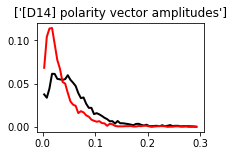

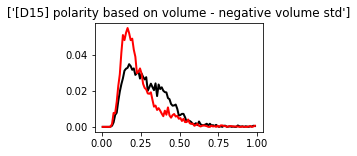

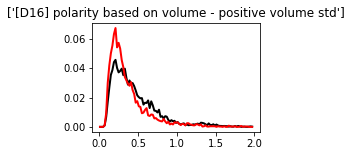

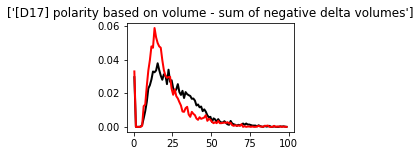

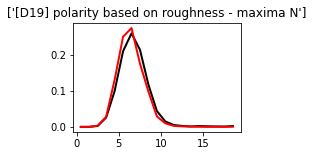

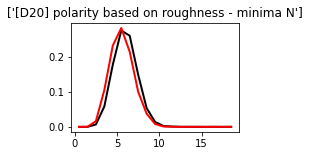

In [57]:
# check statistics [D14 - D20]
t1=['[D14] polarity vector amplitudes']
t2=['[D15] polarity based on volume - negative volume std']
t3=['[D16] polarity based on volume - positive volume std']
t4=['[D17] polarity based on volume - sum of negative delta volumes']
t5=['[D18] polarity based on volume - sum of positive delta volumes']
t6=['[D19] polarity based on roughness - maxima N']
t7=['[D20] polarity based on roughness - minima N']
ts=[t1, t2, t3, t4, t5, t6, t7]

defined_bins=[]
defined_bins.append(np.arange(0,0.3,0.005))
defined_bins.append(np.arange(0,1,0.01))
defined_bins.append(np.arange(0,2,0.02))
defined_bins.append(np.arange(0,100,1))
defined_bins.append(np.arange(0,100,1))
defined_bins.append(np.arange(0,20,1))
defined_bins.append(np.arange(0,20,1))

plt.figure(figsize=(10,10))
tag=1
for io in [1,2,3,4,6,7]:
    i=io-1
    ttstr=ts[i]
    # for i, ttstr in enumerate([t1,t2,t3,t4,t6,t7]):
    k1=v1[i,:]
    k2=v2[i,:]
    k1=k1[~np.isnan(k1)]
    k2=k2[~np.isnan(k2)]
    
    plt.figure(figsize=(3,2))
    plot_histogram(k1,k2,ttstr,bs=defined_bins[i])
    tag+=1

In [20]:
values_for_naive_macrophage.shape

(7, 6550)

<Figure size 1080x1800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '[D14] polarity vector amplitudes  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D14] polarity vector amplitudes  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  infected')

<AxesSubplot:>

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  naive')

<AxesSubplot:>

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  infected')

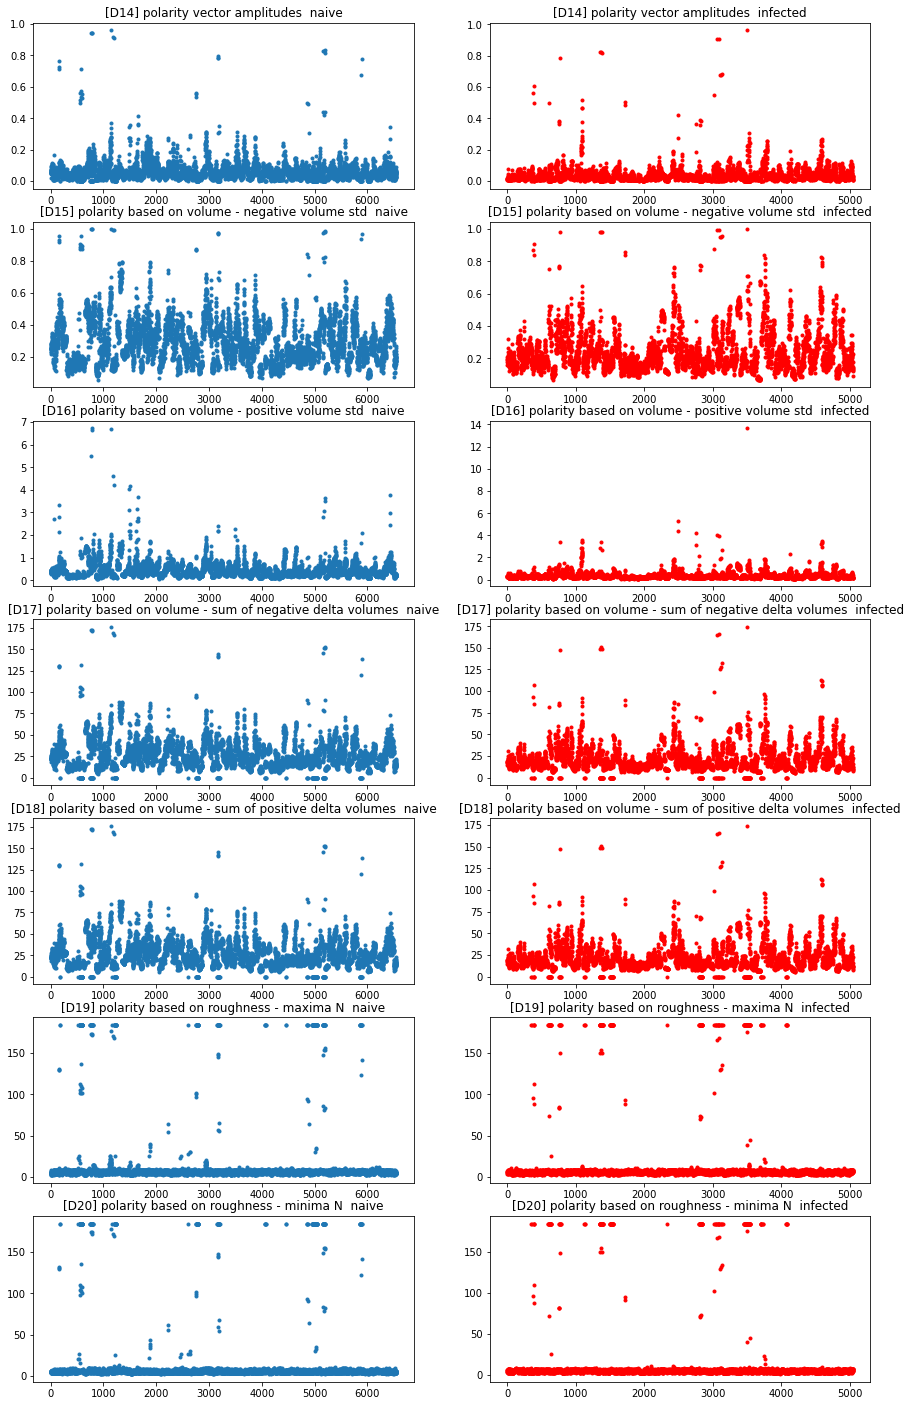

In [30]:
t1=['[D14] polarity vector amplitudes']
t2=['[D15] polarity based on volume - negative volume std']
t3=['[D16] polarity based on volume - positive volume std']
t4=['[D17] polarity based on volume - sum of negative delta volumes']
t5=['[D18] polarity based on volume - sum of positive delta volumes']
t6=['[D19] polarity based on roughness - maxima N']
t7=['[D20] polarity based on roughness - minima N']
ts=[t1,t2,t3,t4,t5,t6,t7]
plt.figure(figsize=(15,25))
for i in np.arange(7):
    plt.subplot(7,2,i*2+1)
    plt.plot(values_for_naive_macrophage[i,:],'.')
    plt.title(ts[i][0]+'  naive')
    plt.subplot(7,2,i*2+2)
    plt.plot(values_for_Lg_macrophage[i,:],'r.')
    plt.title(ts[i][0]+'  infected')


In [54]:
v2.shape

(7, 5050)

In [30]:
def get_AC(ll):
    ac=ll*0
    for t in np.arange(len(ll)):
        data=np.asarray(ll[t:]*ll[:len(ll)-t])
        masked_data = np.ma.masked_array(data, np.isnan(data))
        cc = np.ma.average(masked_data, axis=0)
        ac[t] = cc
    return ac

def get_AC_norm(ll):
    ac=ll*0
    for t in np.arange(len(ll)):
        data=np.asarray(ll[t:]*ll[:len(ll)-t])
        masked_data = np.ma.masked_array(data, np.isnan(data))
        cc = np.ma.average(masked_data, axis=0)
        ac[t] = cc/np.average(ll[t:])/np.average(ll[:len(ll)-t])
    return ac


In [31]:
a=[1,1,1,1,1,0,0,0,0,0]*5
a=np.asarray(a,dtype='float')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


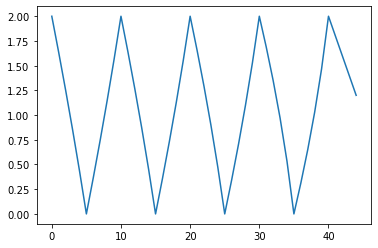

In [33]:
b=get_AC_norm(np.asarray(a))
plt.plot(b)

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

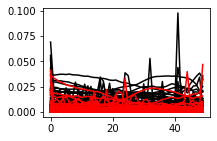

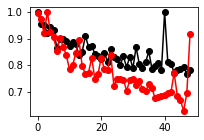

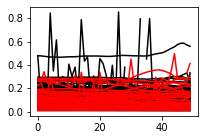

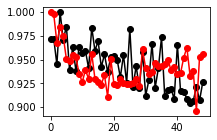

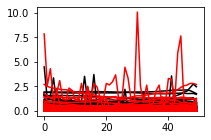

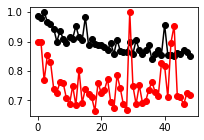

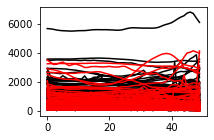

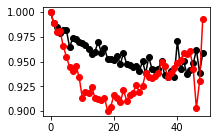

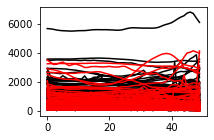

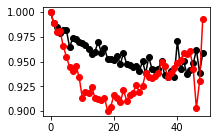

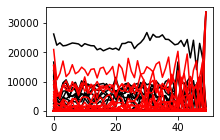

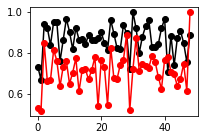

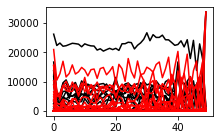

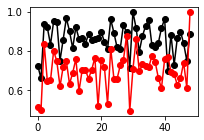

In [59]:
for ind in np.arange(7):
    plt.figure(figsize=(3,2))
    l1=v1[ind,:].reshape(131,50)
    c1=[]
    for i in np.arange(131):
        corr = get_AC(l1[i,:])
        c1.append(corr)
        plt.plot(corr,'k')

    l2=v2[ind,:].reshape(101,50)
    c2=[]
    for i in np.arange(101):
        corr = get_AC(l2[i,:])
        c2.append(corr)
        plt.plot(corr,'r')

    plt.figure(figsize=(3,2))
    # cc=np.sum(,axis=0)
    data=np.asarray(c1)
    masked_data = np.ma.masked_array(data, np.isnan(data))
    cc = np.ma.average(masked_data, axis=0)
    cc=cc[1:]
    plt.plot(cc/np.max(cc),'k-o')
    
#     plt.figure(figsize=(3,2))
    data=np.asarray(c2)
    masked_data = np.ma.masked_array(data, np.isnan(data))
    cc = np.ma.average(masked_data, axis=0)
    cc=cc[1:]
    plt.plot(cc/np.max(cc),'r-o')

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D14] polarity vector amplitudes  naive')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D14] polarity vector amplitudes  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D14] polarity vector amplitudes  naive')

Text(0.5, 1.0, '[D14] polarity vector amplitudes  infected')

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  naive')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  naive')

Text(0.5, 1.0, '[D15] polarity based on volume - negative volume std  infected')

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  naive')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()


Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  naive')

Text(0.5, 1.0, '[D16] polarity based on volume - positive volume std  infected')

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  naive')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  naive')

Text(0.5, 1.0, '[D17] polarity based on volume - sum of negative delta volumes  infected')

<Figure size 216x144 with 0 Axes>

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  naive')

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  naive')

Text(0.5, 1.0, '[D18] polarity based on volume - sum of positive delta volumes  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  naive')

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  naive')

Text(0.5, 1.0, '[D19] polarity based on roughness - maxima N  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  naive')

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  infected')

<Figure size 216x144 with 0 Axes>

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  naive')

Text(0.5, 1.0, '[D20] polarity based on roughness - minima N  infected')

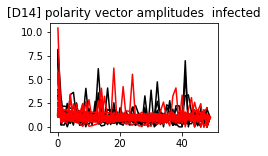

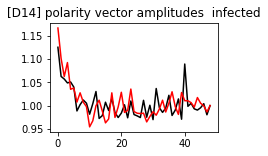

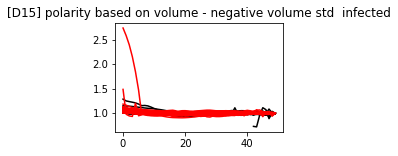

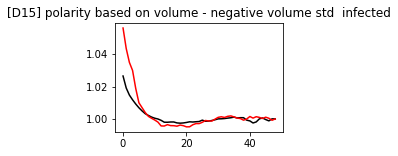

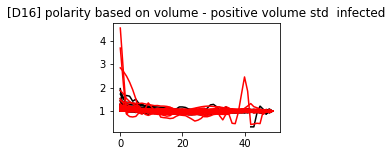

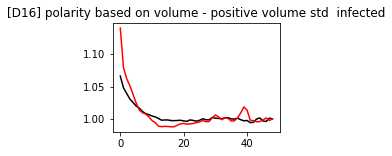

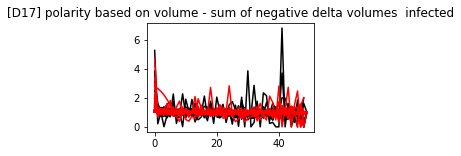

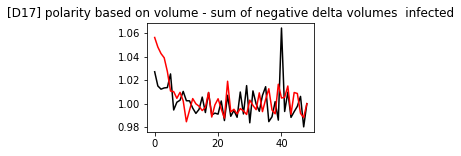

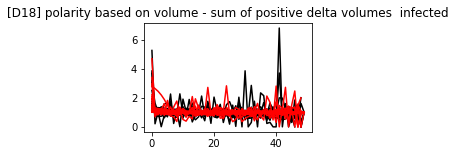

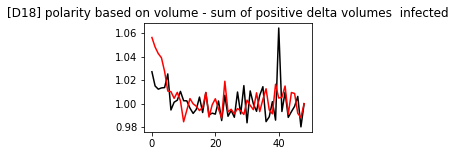

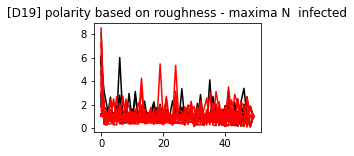

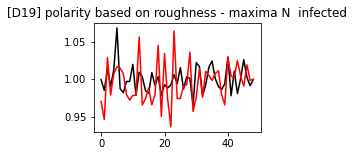

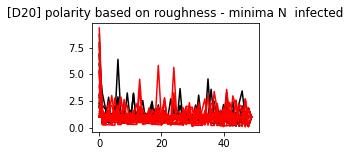

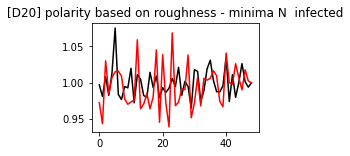

In [61]:
t1=['[D14] polarity vector amplitudes']
t2=['[D15] polarity based on volume - negative volume std']
t3=['[D16] polarity based on volume - positive volume std']
t4=['[D17] polarity based on volume - sum of negative delta volumes']
t5=['[D18] polarity based on volume - sum of positive delta volumes']
t6=['[D19] polarity based on roughness - maxima N']
t7=['[D20] polarity based on roughness - minima N']
ts=[t1,t2,t3,t4,t5,t6,t7]

    
    
for ind in np.arange(7):
    plt.figure(figsize=(3,2))
    l1=v1[ind,:].reshape(131,50)
    c1=[]
    for i in np.arange(131):
        corr = get_AC_norm(l1[i,:])
        c1.append(corr)
        plt.plot(corr, 'k')
    plt.title(ts[ind][0] + '  naive')

    l2=v2[ind, :].reshape(101,50)
    c2=[]
    for i in np.arange(101):
        corr = get_AC_norm(l2[i, :])
        c2.append(corr)
        plt.plot(corr, 'r')
    plt.title(ts[ind][0] + '  infected')

    plt.figure(figsize=(3,2))
    # cc=np.sum(,axis=0)
    data=np.asarray(c1)
    masked_data = np.ma.masked_array(data, np.isnan(data))
    cc = np.ma.average(masked_data, axis=0)
    cc=cc[1:]
    plt.plot(cc, 'k-')
    plt.title(ts[ind][0] + '  naive')

    data=np.asarray(c2)
    masked_data = np.ma.masked_array(data, np.isnan(data))
    cc = np.ma.average(masked_data, axis=0)
    cc=cc[1:]
    plt.plot(cc, 'r-')
    plt.title(ts[ind][0] + '  infected')
